# Calculate Metrics - monthly temperature anomalies in Australia

In this notebook:

* Subsetting
* Create a monthly climatology for 2000-2014 period
* Plot all 12 climatological months
* Calculate the monthly anomalies from the climatology
* Calculate and plot the mean anomalies over the whole time period  

This example uses Coupled Model Intercomparison Project (CMIP6) collections. For more information, please visit [data catalogue]( https://geonetwork.nci.org.au/geonetwork/srv/eng/catalog.search#/metadata/f3154_9976_7262_7595) and [terms of use]( https://pcmdi.llnl.gov/CMIP6/TermsOfUse/TermsOfUse6-1.html).

---------

- Authors: NCI Virtual Research Environment Team
- Keywords: CMIP6, xarray, monthly climatology, monthly anomaly
- Create Date: 2020-Apr
- Lineage/Reference: This example was modified from the original example developed by Dr Aidan Heerdegen from ARC COE Clex group
---

#### Import the xarray and netCDF modules

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

Open the monthly surface temperature dataset from the ACCESS-ESM1.5 CMIP6 model from 2000 to the most recent output (2014). Also select out the `tas` variable and do spatial slicing in the same call.

In [2]:
path_CMIP6 = '/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r1i1p1f1/\
day/tas/gn/v20191115/tas_day_ACCESS-ESM1-5_historical_r1i1p1f1_gn_20000101-20141231.nc'
tas_aus = xr.open_dataset(path_CMIP6).tas.sel(lat=slice(-50,-5), lon=slice(110,160))

tas_aus

<xarray.DataArray 'tas' (time: 5479, lat: 37, lon: 27)>
[5473521 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01T12:00:00 ... 2014-12-31T12:00:00
  * lat      (lat) float64 -50.0 -48.75 -47.5 -46.25 ... -8.75 -7.5 -6.25 -5.0
  * lon      (lon) float64 110.6 112.5 114.4 116.2 ... 153.8 155.6 157.5 159.4
    height   float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-11-15T17:42:13Z altered by CMOR: Treated scalar dime...

Just check the slicing is correct by plotting the first timestep:

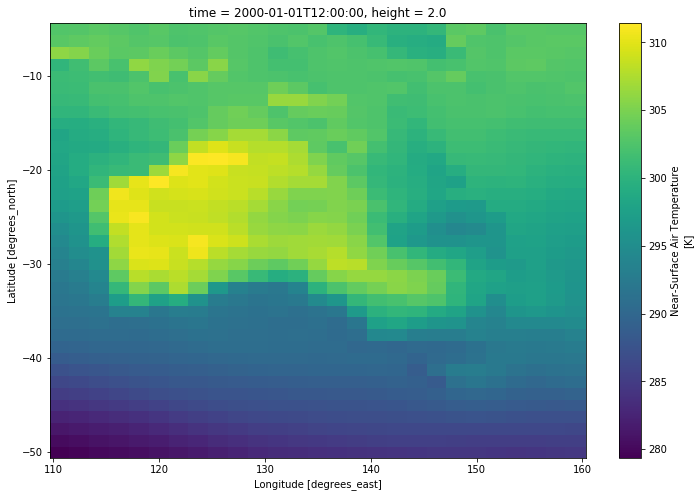

In [3]:
tas_aus.isel(time=0).plot(size=8)

### Now create a monthly climatology for 2001-2014 period

In [4]:
tas_aus_clim = tas_aus.sel(time=slice('2001-01','2014-12')).groupby('time.month').mean(dim='time')

Plot all 12 climatological months

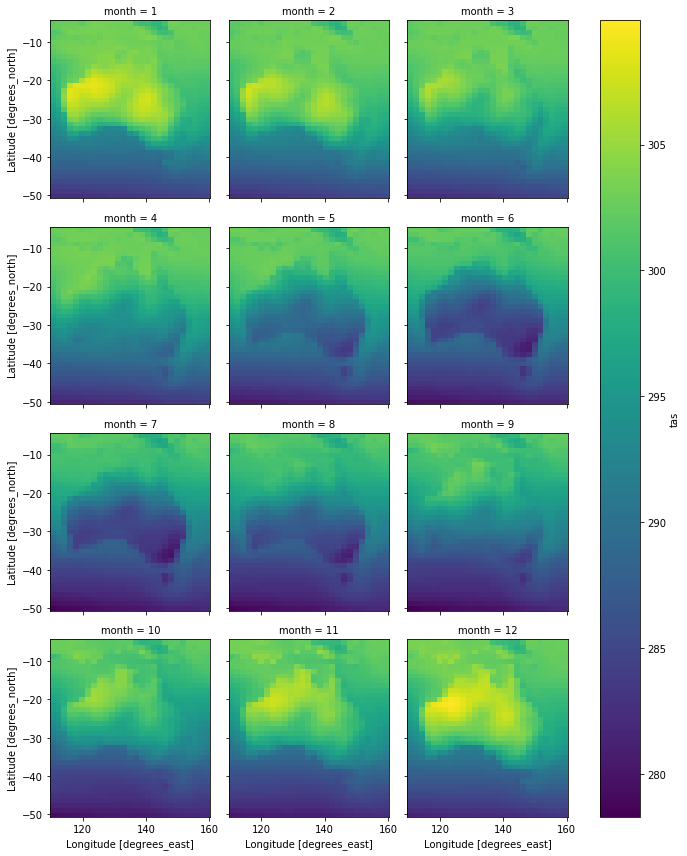

In [5]:
tas_aus_clim.plot(col='month',col_wrap=3)

### Calculate the anomalies from the climatology

In [6]:
tas_aus_anom = (tas_aus.groupby('time.month') - tas_aus_clim)

### Mean anomaly

Now plot the mean anomaly from 2013 to the end of 2014 (the last time point in the dataset) by month. This shows the spatial pattern of warming in the model by month.

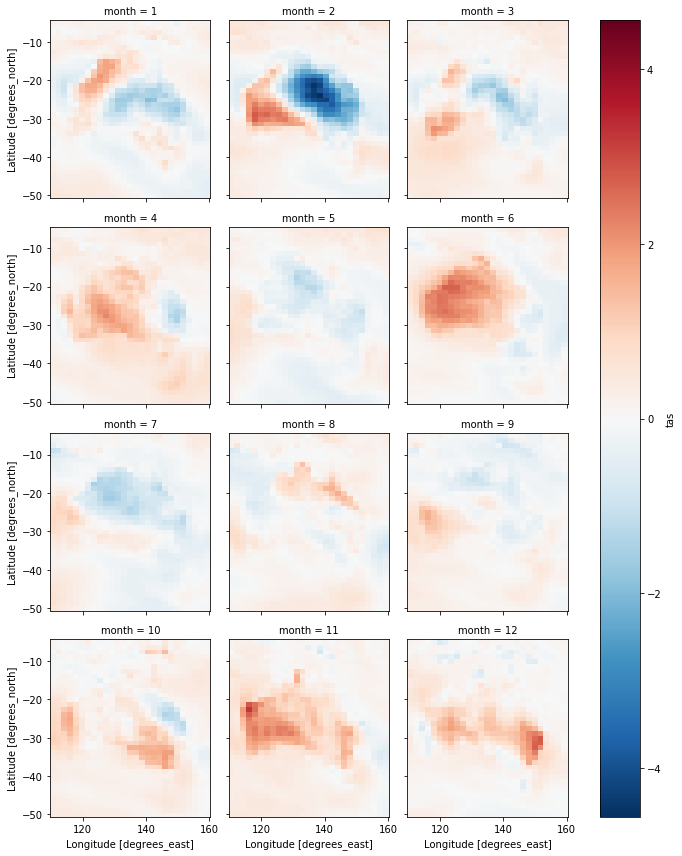

In [7]:
tas_aus_anom.sel(time=slice('2013-01',None)).groupby('time.month').mean(dim='time').plot(col='month',col_wrap=3)

In [8]:
tas_aus_anom

<xarray.DataArray 'tas' (time: 5479, lat: 37, lon: 27)>
array([[[-3.00808716e+00, -2.77798462e+00, -2.59359741e+00, ...,
         -2.23999023e-01, -2.25219727e-01, -2.27539062e-01],
        [-3.08312988e+00, -2.88165283e+00, -2.65115356e+00, ...,
         -1.14776611e-01, -1.70379639e-01, -2.08007812e-01],
        [-3.07992554e+00, -2.84866333e+00, -2.56048584e+00, ...,
          1.21704102e-01,  1.51367188e-02, -4.03747559e-02],
        ...,
        [ 4.72042847e+00,  3.78155518e+00,  1.34890747e+00, ...,
          3.45489502e-01,  3.12622070e-01,  1.44989014e-01],
        [ 7.19726562e-01,  9.83673096e-01,  7.80303955e-01, ...,
          4.50927734e-01,  2.98583984e-01,  2.85705566e-01],
        [ 4.96215820e-01,  5.12512207e-01,  6.62750244e-01, ...,
          3.24523926e-01,  1.45751953e-01,  1.49810791e-01]],

       [[-2.37387085e+00, -2.57315063e+00, -2.61621094e+00, ...,
          8.21838379e-01,  8.42437744e-01,  8.07800293e-01],
        [-2.58734131e+00, -2.81582642e+00, -2.78567505e+00, ...,
          1.12918091e+00,  1.06115723e+00,  8.64959717e-01],
        [-2.71112061e+00, -2.90460205e+00, -2.77923584e+00, ...,
          1.38180542e+00,  1.17388916e+00,  9.30938721e-01],
        ...,
        [ 4.78637695e+00,  5.23666382e+00,  1.34375000e+00, ...,
          4.65850830e-01,  1.88720703e-01,  1.52038574e-01],
        [-2.27355957e-02,  6.97235107e-01,  8.11157227e-01, ...,
          5.00549316e-01,  3.85711670e-01,  1.65618896e-01],
        [ 1.42883301e-01,  6.39190674e-01,  7.51220703e-01, ...,
          7.85369873e-01,  7.36297607e-01,  3.81652832e-01]],

       [[-1.77566528e+00, -1.74438477e+00, -1.61529541e+00, ...,
         -2.54333496e-01, -1.53381348e-01, -2.87780762e-02],
        [-1.44525146e+00, -1.45565796e+00, -1.46212769e+00, ...,
          4.85534668e-02,  1.74438477e-01,  2.18627930e-01],
        [-1.17218018e+00, -1.26867676e+00, -1.19519043e+00, ...,
          3.46496582e-01,  4.80133057e-01,  5.23223877e-01],
        ...,
        [ 3.18475342e+00,  1.07601929e+00,  1.72463989e+00, ...,
          4.82177734e-03,  2.74017334e-01,  1.30554199e-01],
        [ 2.71026611e-01,  6.87255859e-02,  8.13232422e-01, ...,
          2.55157471e-01,  3.24340820e-01,  1.26800537e-01],
        [ 2.91290283e-01,  5.76171875e-01,  7.23815918e-01, ...,
          5.18737793e-01,  3.56903076e-01,  1.98883057e-01]],

       ...,

       [[ 8.44573975e-01,  6.99645996e-01,  6.51367188e-01, ...,
          2.08847046e+00,  1.94799805e+00,  1.74124146e+00],
        [ 7.04254150e-01,  5.53558350e-01,  4.76074219e-01, ...,
          2.09628296e+00,  1.92169189e+00,  1.70025635e+00],
        [ 5.83435059e-01,  4.59350586e-01,  3.71612549e-01, ...,
          2.07461548e+00,  1.84487915e+00,  1.61123657e+00],
        ...,
        [-3.02981567e+00, -2.43927002e+00, -1.77108765e+00, ...,
         -1.28082275e-01, -2.39257812e-02, -4.98168945e-01],
        [-5.25238037e-01, -3.65386963e-01, -6.90887451e-01, ...,
         -1.63269043e-01, -2.70721436e-01, -2.66784668e-01],
        [-2.20703125e-01, -1.26159668e-01, -7.40661621e-02, ...,
         -3.60839844e-01, -2.26318359e-01,  2.45819092e-01]],

       [[ 4.73571777e-01,  4.81964111e-01,  5.15258789e-01, ...,
          1.60430908e+00,  1.59640503e+00,  1.64355469e+00],
        [ 2.68981934e-01,  3.03283691e-01,  4.05212402e-01, ...,
          1.53924561e+00,  1.59777832e+00,  1.66018677e+00],
        [ 1.27655029e-01,  1.08886719e-01,  1.53045654e-01, ...,
          1.58563232e+00,  1.65853882e+00,  1.72210693e+00],
        ...,
        [-2.89727783e+00, -2.52380371e+00, -1.76602173e+00, ...,
         -7.48901367e-01, -5.66772461e-01, -7.19299316e-02],
        [-4.73937988e-01, -1.27655029e-01,  2.32849121e-02, ...,
          1.89819336e-01, -2.96081543e-01,  1.45660400e-01],
        [-3.33770752e-01, -2.38189697e-01, -1.15875244e-01, ...,
         -2.68005371e-01, -4.44335938e-02,  7.80212402e-01]],

       [[-2.34771729e-01, -1.87377930e-01, -9.68017578e-02, ...,
          1

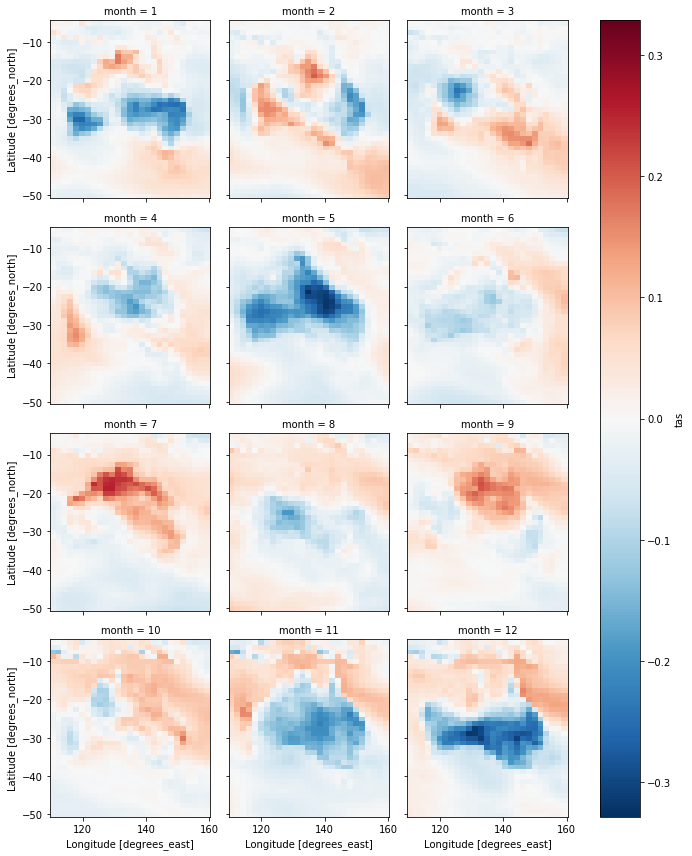

In [9]:
tas_aus_anom.sel(time=slice('2000-01',None)).groupby('time.month').mean(dim='time').plot(col='month',col_wrap=3)

### Summary

This example shows how to use xarry to calculate some commonly used climate metrics, e.g. monthly climatology, monthly anomaly and the mean anomaly.

## Reference

http://xarray.pydata.org/en/stable/

https://github.com/coecms-training/introduction_to_xarray
